In [39]:
#1 REGRESIÓN LOGÍSTICA
#Importamos todas las librerias que utilizaremos en el desarrollo
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# prueba


In [40]:
#2 Cargamos los datos de entrada del archivo EXCEL contenido en nuestro Drive
df = pd.read_csv("/content/drive/MyDrive/MINERIA DE DATOS TAREAS/Admission_Predict2.csv")
df.head()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
#3 Analisis exploratorio.
#Realizamos una descipcion estadistica basica de las distintas variables del set de datos, cantidad, media, devio standard, valor minimo, primer cuartil, segundo cuartil, tercer cuartil, valor maximo.
df.describe()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [42]:
#4 Analisis exploratorio.
#Descripcion de las columnas, sus nombres cantidad de datos contenidos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<Axes: >

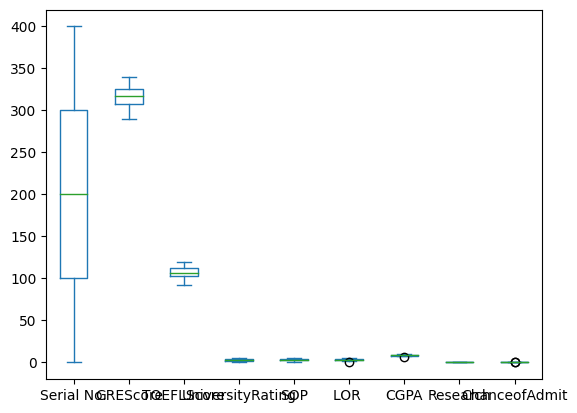

In [43]:
#diagrama de caja para las variables contenidas en el dataframe
df.plot.box()

<Axes: >

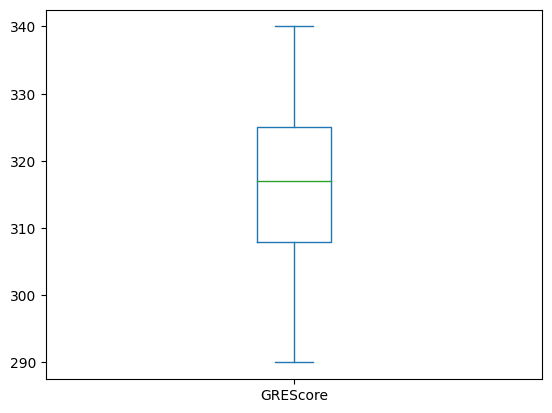

In [44]:
#diagrama de caja para las variables contenidas en el dataframe
df.GREScore.plot.box()

<Axes: >

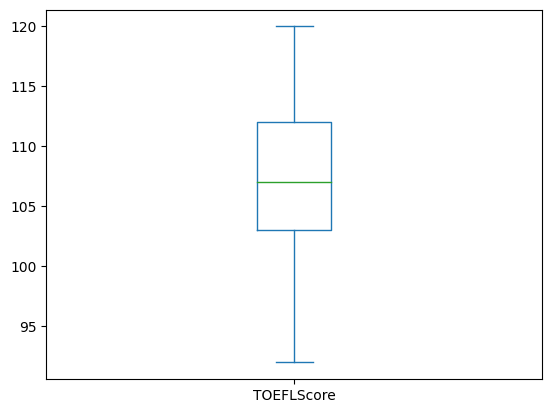

In [63]:
#diagrama de caja para las variables contenidas en el dataframe
df.TOEFLScore.plot.box()

<Axes: >

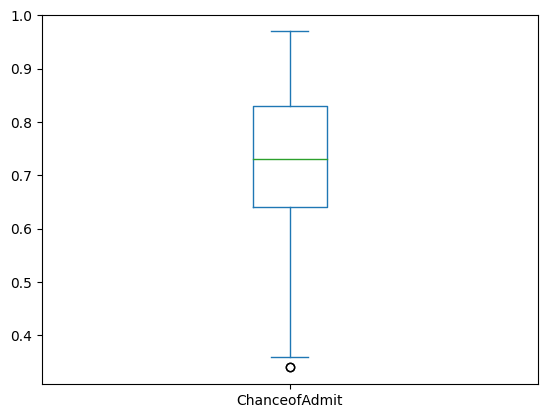

In [64]:
#diagrama de caja para las variables contenidas en el dataframe
df.ChanceofAdmit.plot.box()

In [48]:
df['admision'] = df['ChanceofAdmit'].apply(lambda x: 0 if 0.1 <= x <= 0.49 else 1)

In [49]:
df

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,admision
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,1


In [50]:
#17 organizamos los datos en dos matrices de analisis: X con caracteristicas, e Y como variable objetivo
X = np.array(df.drop(['GREScore','TOEFLScore'], axis=1))
y = np.array(df['admision'])
X.shape

(400, 8)

In [51]:
#18 creamos una instancia del modelo de regresión logística
model = linear_model.LogisticRegression(solver='liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [52]:
#19 Aqui ejecutamos las predicciones en el conjunto de datos de características (X) utilizando el modelo de regresión logística que ya entrenamos previamente
predictions = model.predict(X)
print(predictions[0:20])

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [53]:
#20  Ahora calculamos la precisión del modelo de regresión logística que ejecutamos
model.score(X,y)

1.0

In [54]:
#21 Validacion del modelo con un 20% destinado a la validacion y el 80% al entrenamiento
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [55]:
#22 ejecutamos un modelo de validacion cruzada para evaluar el rendimiento del modelo
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 1.000000 (0.000000)


In [56]:
#23 calculamos la precision del modelo en funcion del conjunto de datos de validacion y prediccion
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

1.0


In [57]:
#24 realizamos el reporte de la matriz de confusión que muestra cómo nuestro modelo de clasificación se desempeñó respecto del conjunto de validación
print(confusion_matrix(Y_validation, predictions))

[[ 9  0]
 [ 0 71]]


In [58]:
#25 Imprimimos un informe de Metricas de desempeño del modelo
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        71

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [62]:
#26 porbamos el modelo con nuevos datos
Xn = np.array([[6,4,5,4], [2,7,2,4],[7,7,1,4],[1,5,3,4]])
Yn = model.predict(Xn)
print(Yn)

ValueError: ignored